# Trabalho 2 de Inteligência Artificial
 
## Integrantes do Grupo
- **Leonardo Gueno Rissetto** (13676482)
- **Lucas Lima Romero** (13676325)
- **Luciano Gonçalves Lopes Filho** (13676520)
- **Marco Antonio Gaspar Garcia** (11833581)
- **Thiago Kashivagui Gonçalves** (13676579)
 
---
 
## Introdução
 
Este notebook apresenta a preparação, análise exploratória e modelagem preditiva utilizando o dataset de predição de diabetes disponível no Kaggle.
 
O objetivo é construir um modelo capaz de prever a ocorrência de diabetes a partir de variáveis clínicas e demográficas.
 
[Link para o dataset no Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)
 
---
 
### Metodologia
 
- **Caracterização dos dados**: Luciano
- **Exploração dos dados**: Marco e Lucas
- **Pré-processamento**: Leonardo e Thiago


## 1. Importação das Bibliotecas
 
As bibliotecas abaixo são essenciais para análise de dados, visualização e construção do modelo preditivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento e Visualização Inicial dos Dados
 
O dataset é carregado e as primeiras linhas são exibidas para uma inspeção inicial.

In [2]:
# Carregar o dataset
df = pd.read_csv('../Dataset/diabetes_prediction_dataset.csv')
df_original = df.copy()
# Visualizar as primeiras linhas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 3. Informações Gerais e Tratamento de Valores Ausentes
 
Verificamos os tipos de dados, valores ausentes e realizamos o tratamento adequado para garantir a qualidade dos dados.

In [3]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Verificar valores ausentes
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
# Preencher valores ausentes com a mediana (numéricos) ou moda (categóricos)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

## 4. Análise Exploratória dos Dados
 
Exploramos estatísticas descritivas e visualizações para entender a distribuição das variáveis e possíveis padrões.

In [6]:
# Estatísticas descritivas
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


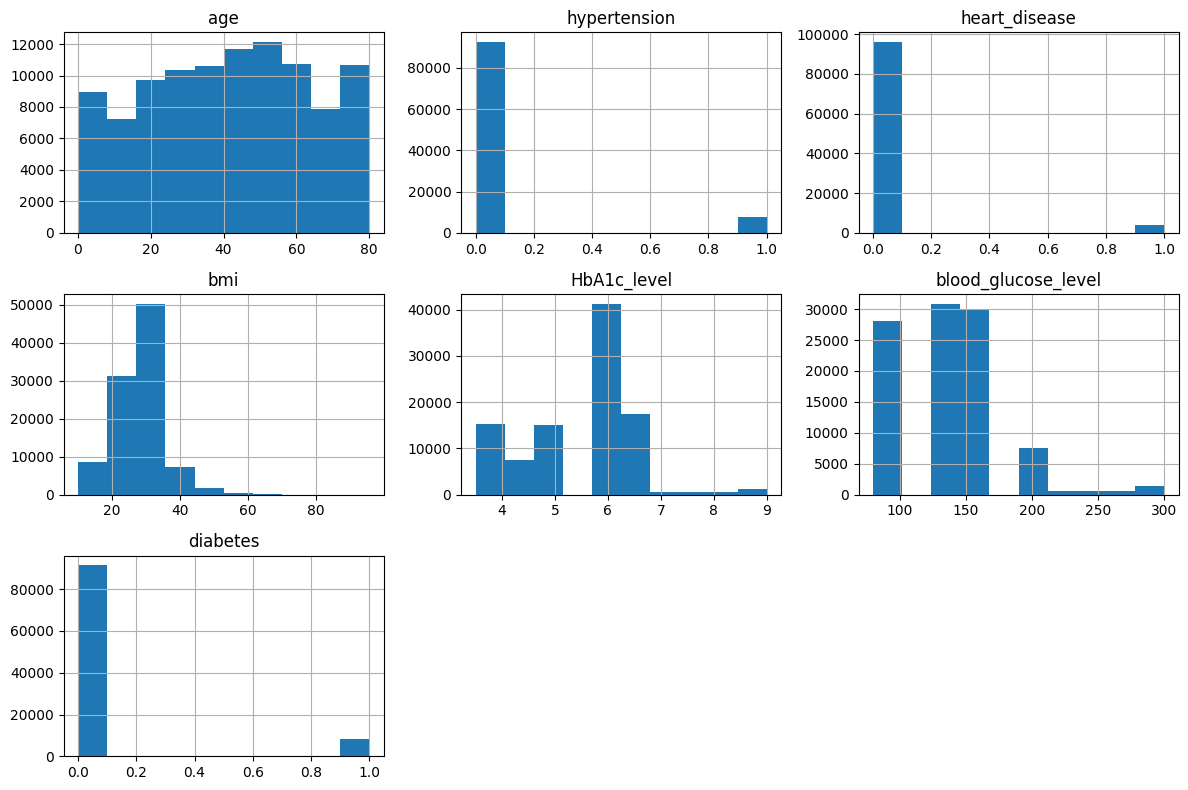

In [7]:
# Visualização de distribuições das variáveis numéricas
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

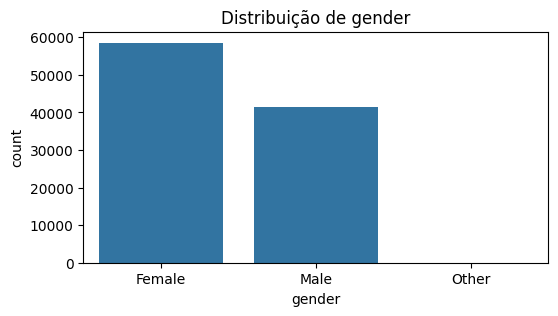

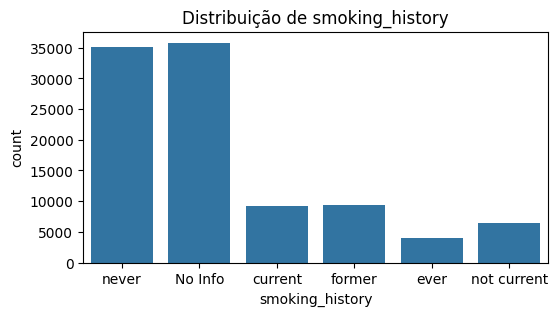

In [8]:
# Visualização de variáveis categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribuição de {col}')
    plt.show()

## 5. Codificação de Variáveis Categóricas
 
Variáveis categóricas são transformadas em numéricas para possibilitar o uso em modelos de machine learning.

In [9]:
# Codificação de variáveis categóricas
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## 6. Normalização/Padronização dos Dados
 
As variáveis numéricas são padronizadas para garantir que todas estejam na mesma escala, facilitando o treinamento do modelo.

In [10]:
# Selecionar colunas numéricas, exceto a coluna alvo
num_cols = df.select_dtypes(include=np.number).columns.drop('diabetes')
# Padronização (z-score)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## 7. Dataset Pronto para Modelagem
 
Visualizamos o dataset final, já tratado e pronto para ser utilizado na modelagem preditiva.

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704,0
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210,0
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878,0
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183,0
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183,0


## 8. Modelagem Preditiva: Classificação de Diabetes
 
Nesta etapa, construímos e avaliamos um modelo de classificação para prever a ocorrência de diabetes.

In [12]:
# Separar variáveis preditoras (X) e alvo (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [13]:
# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [14]:
# Treinar modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Avaliar o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nMatriz de Confusão:')
print(confusion_matrix(y_test, y_pred))
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.969

Matriz de Confusão:
[[913   2]
 [ 29  56]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       915
           1       0.97      0.66      0.78        85

    accuracy                           0.97      1000
   macro avg       0.97      0.83      0.88      1000
weighted avg       0.97      0.97      0.97      1000



## 9. Conclusão da Modelagem
 
O modelo Random Forest foi treinado e avaliado utilizando métricas como acurácia, matriz de confusão e relatório de classificação.
 
A acurácia obtida foi de aproximadamente **97%**, indicando um excelente desempenho do modelo para o conjunto de dados utilizado.
 
É importante ressaltar que, além da acurácia, métricas como precisão, recall e F1-score devem ser analisadas para garantir que o modelo está performando bem em ambas as classes (com e sem diabetes).
 
O resultado sugere que o modelo pode ser uma ferramenta útil para auxiliar na predição de diabetes, mas recomenda-se validação adicional em outros conjuntos de dados e análise de possíveis vieses.

In [16]:
import joblib

# Salvar o modelo treinado
joblib.dump(clf, 'random_forest_diabetes.pkl')

# Salvar o scaler utilizado
joblib.dump(scaler, 'scaler_diabetes.pkl')

['scaler_diabetes.pkl']

## 10. Inteligência Artificial Explicável (XAI) - Entendendo o Modelo

Agora que temos um modelo com bom desempenho, vamos usar técnicas de XAI para "abrir a caixa-preta" e entender **por que** ele toma certas decisões. Isso é crucial para gerar confiança, depurar o modelo e comunicar os resultados.

In [17]:
# Instala as bibliotecas necessárias para XAI, caso ainda não estejam no ambiente
!pip install shap


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

print("Preparando para a análise XAI...")

Preparando para a análise XAI...


### 10.1. Explicação Global: Importância de Atributos (Feature Importance)

Vamos começar com a técnica mais direta, nativa do Random Forest. Ela nos mostra quais características (atributos) o modelo considerou mais importantes, em média, para fazer suas previsões em todo o conjunto de dados.

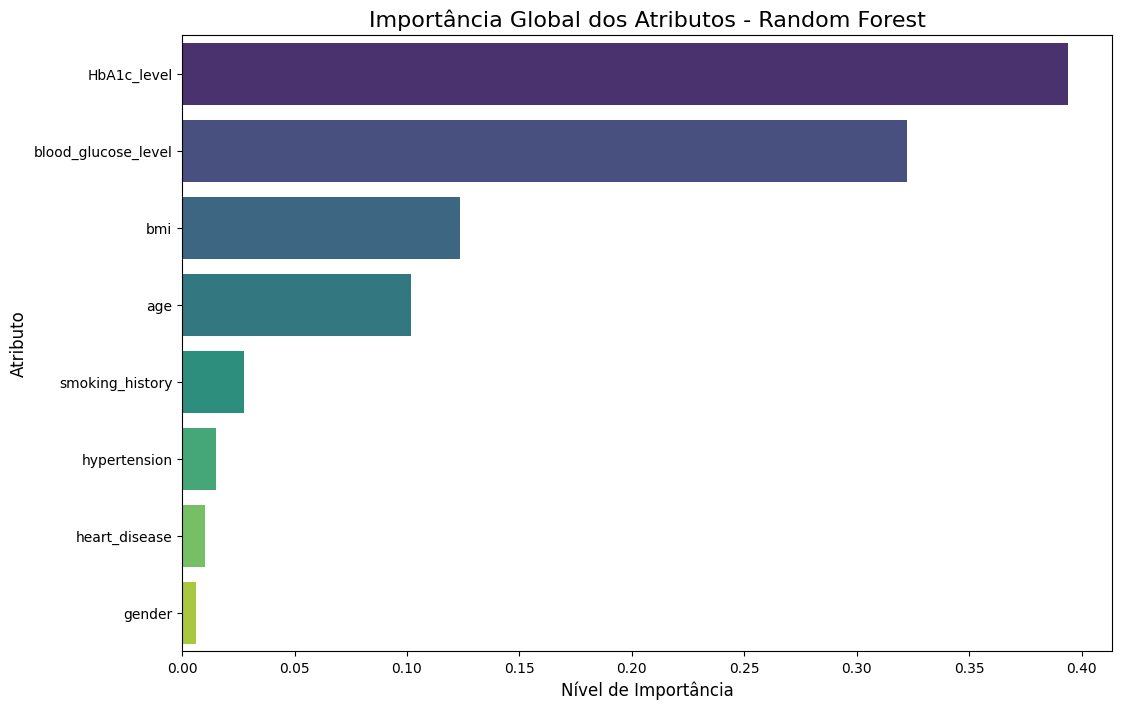

In [19]:
importances = clf.feature_importances_ 
feature_names = X.columns 

# Cria um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plota o gráfico de importância
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importância Global dos Atributos - Random Forest', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Atributo', fontsize=12)
plt.show()

### 10.2. Explicação Avançada com SHAP (SHapley Additive exPlanations)

SHAP é uma abordagem mais sofisticada que nos dá uma visão detalhada tanto global quanto local. Ele calcula a contribuição de cada atributo para "empurrar" a previsão para um lado (positivo ou negativo) de forma justa e consistente.

In [20]:
# O explainer é treinado com o modelo e os dados de treino (que estão escalados)
explainer = shap.TreeExplainer(clf)

# Os valores SHAP são calculados sobre os dados de teste (que também estão escalados)
shap_values = explainer.shap_values(X_test)

print("Valores SHAP calculados com sucesso!")

Valores SHAP calculados com sucesso!


#### 10.2.1. Visão Geral Global com SHAP

O gráfico de resumo do SHAP é muito mais rico que o gráfico de barras padrão. Ele mostra não apenas a importância de uma feature, mas também o **impacto dos seus valores** (altos ou baixos) na previsão.

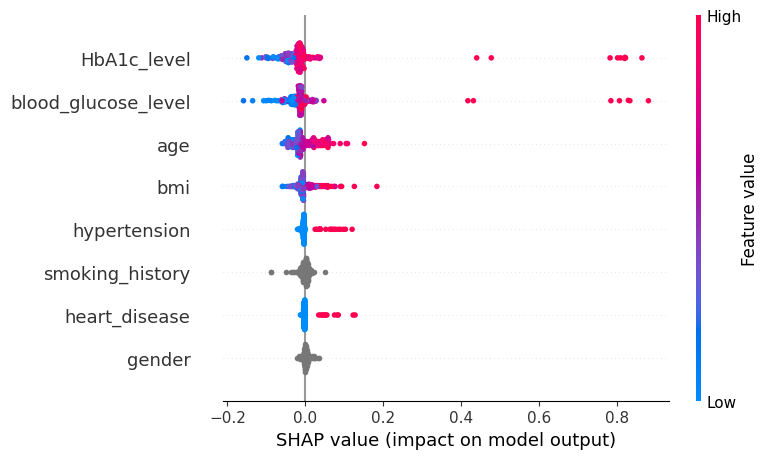

In [21]:
# Garante que o JavaScript do SHAP está carregado (necessário para notebooks)
shap.initjs()

# Cria a amostra dos dados de teste
X_test_sample = X_test.sample(n=200, random_state=42)

# Calcula os valores SHAP
shap_values_sample = explainer.shap_values(X_test_sample)

# Prepara o DataFrame para exibição
X_test_display = df_original.drop('diabetes', axis=1).loc[X_test_sample.index]

# Gera o gráfico de resumo.
shap.summary_plot(shap_values_sample[:, :, 1], X_test_display)

### 10.2.2. Visão Local com SHAP: Explicando uma Predição Individual

E se quisermos saber por que o modelo fez uma previsão para um **único paciente**? O SHAP pode nos mostrar as "forças" que levaram a essa decisão.

Analisando a predição para o paciente (índice original: 27701)
Dados do paciente (valores originais):
gender                 Female
age                      30.0
hypertension                0
heart_disease               0
smoking_history        former
bmi                     32.04
HbA1c_level               5.0
blood_glucose_level       130
Name: 27701, dtype: object




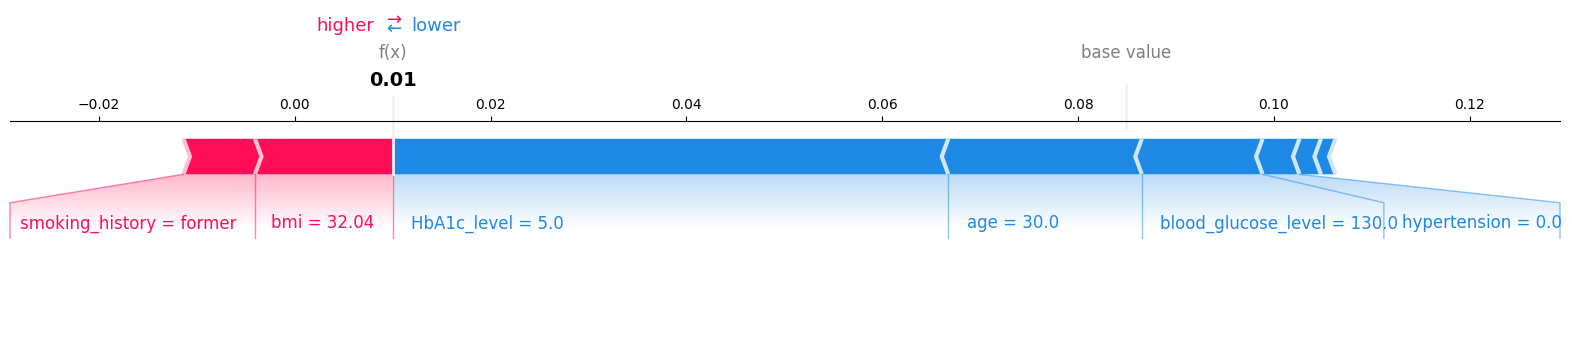

In [22]:
# Escolhe um paciente para explicar
paciente_index = 10

# Pega os dados ORIGINAIS (não escalados) do paciente
paciente_data_original = df_original.drop('diabetes', axis=1).loc[X_test.index[paciente_index]]

# Seleciona os valores SHAP para este paciente e para a classe positiva
paciente_shap_values = shap_values[paciente_index, :, 1]

# Pega o valor base do modelo para a classe positiva
base_value = explainer.expected_value[1]

# Impressão
print(f"Analisando a predição para o paciente (índice original: {X_test.index[paciente_index]})")
print("Dados do paciente (valores originais):")
print(paciente_data_original)
print("\n")

# Gera o Gráfico de Força (Force Plot) com o Matplotlib
# e o armazena em uma variável sem exibi-lo ainda
force_plot_fig = shap.force_plot(base_value,
                                 paciente_shap_values,
                                 paciente_data_original,
                                 matplotlib=True,
                                 show=False)

# Define a cor de fundo da figura como branco
force_plot_fig.set_facecolor('white')

# Exibe o gráfico final customizado
plt.show()

## Conclusão da Análise XAI

Com estas análises, conseguimos ir além da simples acurácia. Agora entendemos quais fatores como `HbA1c_level`, `blood_glucose_level` e `age` são os mais decisivos para o modelo (visão global). Mais importante, somos capazes de auditar e explicar predições individuais para qualquer paciente, o que é um passo essencial para a implementação de um sistema de IA confiável e responsável na área da saúde.